In [18]:
#Creating dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
from ipywidgets import widgets, interactive
import plotly.graph_objects as go

In [19]:
#Read the file
data_country_to_load = "Resources/country_vaccinations_by_manufacturer.csv"
data_country = pd.read_csv(data_country_to_load,sep=',')
data_country_df = pd.DataFrame(data_country)
data_country_df.columns
# list(data_country.columns)
data_country_df

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30938
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
8633,Uruguay,2021-07-05,Pfizer/BioNTech,1024793
8634,Uruguay,2021-07-05,Sinovac,3045997
8635,Uruguay,2021-07-06,Oxford/AstraZeneca,43245
8636,Uruguay,2021-07-06,Pfizer/BioNTech,1038942


In [3]:
#type of vaccines
diff_vaccines = data_country_df["vaccine"].unique()
diff_vaccines_df = pd.DataFrame({"Type of Vaccines" : diff_vaccines})
diff_vaccines_df

,Type of Vaccines
0,Johnson&Johnson
1,Moderna
2,Oxford/AstraZeneca
3,Pfizer/BioNTech
4,Sinovac
5,CanSino
6,Sputnik V
7,Sinopharm/Beijing


In [4]:
#List of countries

diff_country = data_country_df["location"].unique()
diff_country_df = pd.DataFrame({"Country" : diff_country})
diff_country_df

,Country
0,Austria
1,Belgium
2,Bulgaria
3,Chile
4,Croatia
5,Cyprus
6,Czechia
7,Denmark
8,Estonia
9,Finland


In [64]:
# Vaccinations administered by Country
vaccine_by_country = data_country_df.groupby(["location", "vaccine"])["total_vaccinations"].max()
vaccine_by_country_df = pd.DataFrame(vaccine_by_country )
# vaccine_by_country_df.rename(columns={'location': 'Country', "vaccine": "Vaccine", "total_vaccinations":"Total Vaccinations" },inplace = False)
vaccine_by_country_df

total_vaccinations
location      vaccine                               
Austria       Johnson&Johnson                 130125
              Moderna                         799614
              Oxford/AstraZeneca             1386488
              Pfizer/BioNTech                5838062
Belgium       Johnson&Johnson                 270487
...                                              ...
United States Moderna                      134803711
              Pfizer/BioNTech              182920075
Uruguay       Oxford/AstraZeneca               43245
              Pfizer/BioNTech                1038942
              Sinovac                        3079853

[126 rows x 1 columns]

In [42]:
#total number of vaccinations per country
vaccines_by_country = data_country_df.groupby(["location", "vaccine"])["total_vaccinations"].max()
total_vaccines_by_country_df = pd.DataFrame({"Total no. of Vaccinations": vaccines_by_country})
total_vaccines_by_country_df


Total no. of Vaccinations
location      vaccine                                      
Austria       Johnson&Johnson                        130125
              Moderna                                799614
              Oxford/AstraZeneca                    1386488
              Pfizer/BioNTech                       5838062
Belgium       Johnson&Johnson                        270487
...                                                     ...
United States Moderna                             134803711
              Pfizer/BioNTech                     182920075
Uruguay       Oxford/AstraZeneca                      43245
              Pfizer/BioNTech                       1038942
              Sinovac                               3079853

[126 rows x 1 columns]

In [37]:
#Highest vaccinated countries

cols = ['location', 'total_vaccinations']
vacc_amount = data_country_df[cols].groupby('location').max().sort_values('total_vaccinations', ascending=False)
vacc_amount = vacc_amount.iloc[:33]
vacc_amount
# plt.figure(figsize=(16, 7))
# plt.bar(vacc_amount.index, vacc_amount.total_vaccinations, color = 'c')

# plt.title('Total people vaccinated per country')
# plt.xticks(rotation = 90)
# plt.ylabel('Number of vaccinated citizens (per 10 Million)')
# plt.xlabel('Countries')
# plt.show();

,total_vaccinations
location,
United States,182920075
Germany,57175595
Japan,49500509
France,44116226
Italy,38399701
Spain,28924331
Poland,21522534
Chile,17604704
Netherlands,12064251


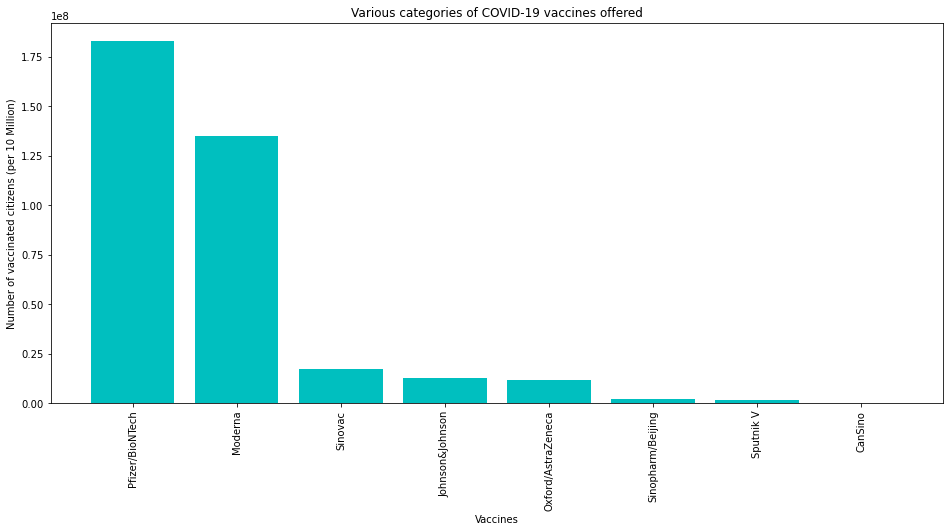

In [65]:
plt.figure(figsize=(16,7))
grp = ['location', 'total_vaccinations',  'vaccine']
vacc_no = data_country_df[grp].groupby('vaccine').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])


plt.bar(vacc_no.index, vacc_no.total_vaccinations, color ='c')

plt.title('Various categories of COVID-19 vaccines offered')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Vaccines')
plt.show();




In [9]:
usa_vacc_trend = data_country_df.groupby("location")["date"].unique()
usa_vacc_trend
# plt.figure(figsize=(20,7))
# sns.lineplot(data=usa_vacc_trend,x="date",y="daily_vaccinations",marker='s', markersize = 12);

# plt.xticks(rotation=90);
# plt.title("USA's total vaccinations trend");

location
Austria          [2021-01-08, 2021-01-15, 2021-01-22, 2021-01-2...
Belgium          [2021-01-08, 2021-01-15, 2021-01-22, 2021-01-2...
Bulgaria         [2021-01-01, 2021-01-08, 2021-01-15, 2021-01-2...
Chile            [2020-12-24, 2020-12-25, 2020-12-26, 2020-12-2...
Croatia          [2021-01-01, 2021-01-08, 2021-01-15, 2021-01-2...
Cyprus           [2021-01-01, 2021-01-08, 2021-01-15, 2021-01-2...
Czechia          [2020-12-27, 2020-12-28, 2020-12-29, 2020-12-3...
Denmark          [2021-01-08, 2021-01-15, 2021-01-22, 2021-01-2...
Estonia          [2021-01-01, 2021-01-08, 2021-01-15, 2021-01-2...
Finland          [2021-01-01, 2021-01-08, 2021-01-15, 2021-01-2...
France           [2020-12-27, 2020-12-28, 2020-12-29, 2020-12-3...
Germany          [2020-12-27, 2020-12-28, 2020-12-29, 2020-12-3...
Hungary          [2021-01-01, 2021-01-08, 2021-01-15, 2021-01-2...
Iceland          [2020-12-28, 2020-12-29, 2020-12-30, 2020-12-3...
Ireland          [2021-01-01, 2021-01-08, 2021-01-15,

In [10]:
#Bar plot graph for countries
# location = widgets.Dropdown(
#     options=['All'] + list(data_country_df["location"].unique()),
#     value='All',
#     description='Country:',
# )

# vaccine = widgets.Dropdown(
#     options=['All'] + list(data_country_df["vaccine"].unique()),
#     value='All',
#     description='Vaccines:',
# )

# def plotit(location, vaccine):
#     vaccine_by_country_df.plot(kind='bar',  title="Country = {}".format(country))
#     vaccine_by_country.unstack().plot(kind='bar', stacked=True,figsize=(30,10), title="Country:".format(Country))
# plt.show();

# interactive(plotit, location=location)

# def plot_bars(location):
#     vaccine_by_country_df.query('location == @location').plot.bar(x='Vaccines', y='Total vaccinations')

# widgets.interact(plot_bars, location=widgets.Dropdown(value='Austria', options=vaccine_by_country_df.location.unique()))

# df2 = data_country_df.pivot(index='vaccine', columns='location').fillna(0).astype(int)['total_vaccinations']

# country=widgets.Dropdown(value='Austria', options=list(data_country_df["location"].unique()))

# def plot_bars(country):
#     ax = df2[country].plot.bar()
#     ax.set_ylim(ymax=df2.max().max()*1.1)
    

# interactive(plot_bars, country=widgets.Dropdown(value='Austria', options=list(data_country_df["location"].unique())))


In [11]:
# Vaccinations administered by Date
vaccine_by_date = data_country_df.groupby(["date","location","vaccine"])["total_vaccinations"].sum()
vaccine_by_date

date        location  vaccine           
2020-12-04  Latvia    Moderna                     1
2020-12-16  Latvia    Pfizer/BioNTech             1
2020-12-20  Latvia    Moderna                     4
2020-12-22  Latvia    Pfizer/BioNTech             3
2020-12-24  Chile     Pfizer/BioNTech           420
                                             ...   
2021-07-06  Slovakia  Pfizer/BioNTech       2523899
                      Sputnik V               18579
            Uruguay   Oxford/AstraZeneca      43245
                      Pfizer/BioNTech       1038942
                      Sinovac               3079853
Name: total_vaccinations, Length: 8638, dtype: int64

In [22]:
#Vaccinations percentage by country
# data_perc = (data_country_df[data_country_df["location"]=="Austria", "vaccine"])].tolist()
# data_perc

In [23]:
# fig = px.bar(total_vaccines_by_country_df, 
#              y = 'Total no. of Vaccinations',
#              x = total_vaccines_by_country_df.index,
#              color = 'Total no. of Vaccinations',
#              color_discrete_sequence= px.colors.sequential.Viridis_r
#             )
# fig.update_layout(
#     title={
#             'text' : "Vaccination till date in various countries",
#             'y':0.95,
#             'x':0.5
#         },
#     xaxis_title="Countries",
#     yaxis_title="Total vaccinated",
#     legend_title="Total vaccinated"
# )
# fig.show()

In [14]:
#Creating a path for new CSV path
fully_vaccinated_to_load = "Resources/share-people-fully-vaccinated-covid (1).csv"
fully_vaccinated = pd.read_csv(fully_vaccinated_to_load,sep=',')
fully_vaccinated_df = pd.DataFrame(fully_vaccinated)
fully_vaccinated_df.columns



Index(['Entity', 'Code', 'Day', 'people_fully_vaccinated_per_hundred'], dtype='object')

In [15]:
fully_vaccinated_df


,Entity,Code,Day,people_fully_vaccinated_per_hundred
0,Africa,NaN,2021-02-03,0.00
1,Africa,NaN,2021-02-04,0.00
2,Africa,NaN,2021-02-05,0.00
3,Africa,NaN,2021-02-06,0.00
4,Africa,NaN,2021-02-08,0.00
...,...,...,...,...
7962,Zimbabwe,ZWE,2021-05-07,0.94
7963,Zimbabwe,ZWE,2021-05-08,1.00
7964,Zimbabwe,ZWE,2021-05-09,1.06
7965,Zimbabwe,ZWE,2021-05-10,1.09


In [16]:
new_df2 = fully_vaccinated_df.groupby(["Entity"])["people_fully_vaccinated_per_hundred"].sum()
print("Highest value of people fully vaccinated per hundred, per country:", new_df2)


Highest value of people fully vaccinated per hundred, per country: Entity
Africa                 19.22
Albania                 0.08
Andorra                28.80
Anguilla                5.22
Argentina             127.35
                      ...   
Vietnam                 0.05
Wales                1121.93
Wallis and Futuna      39.69
World                 165.60
Zimbabwe               17.78
Name: people_fully_vaccinated_per_hundred, Length: 149, dtype: float64


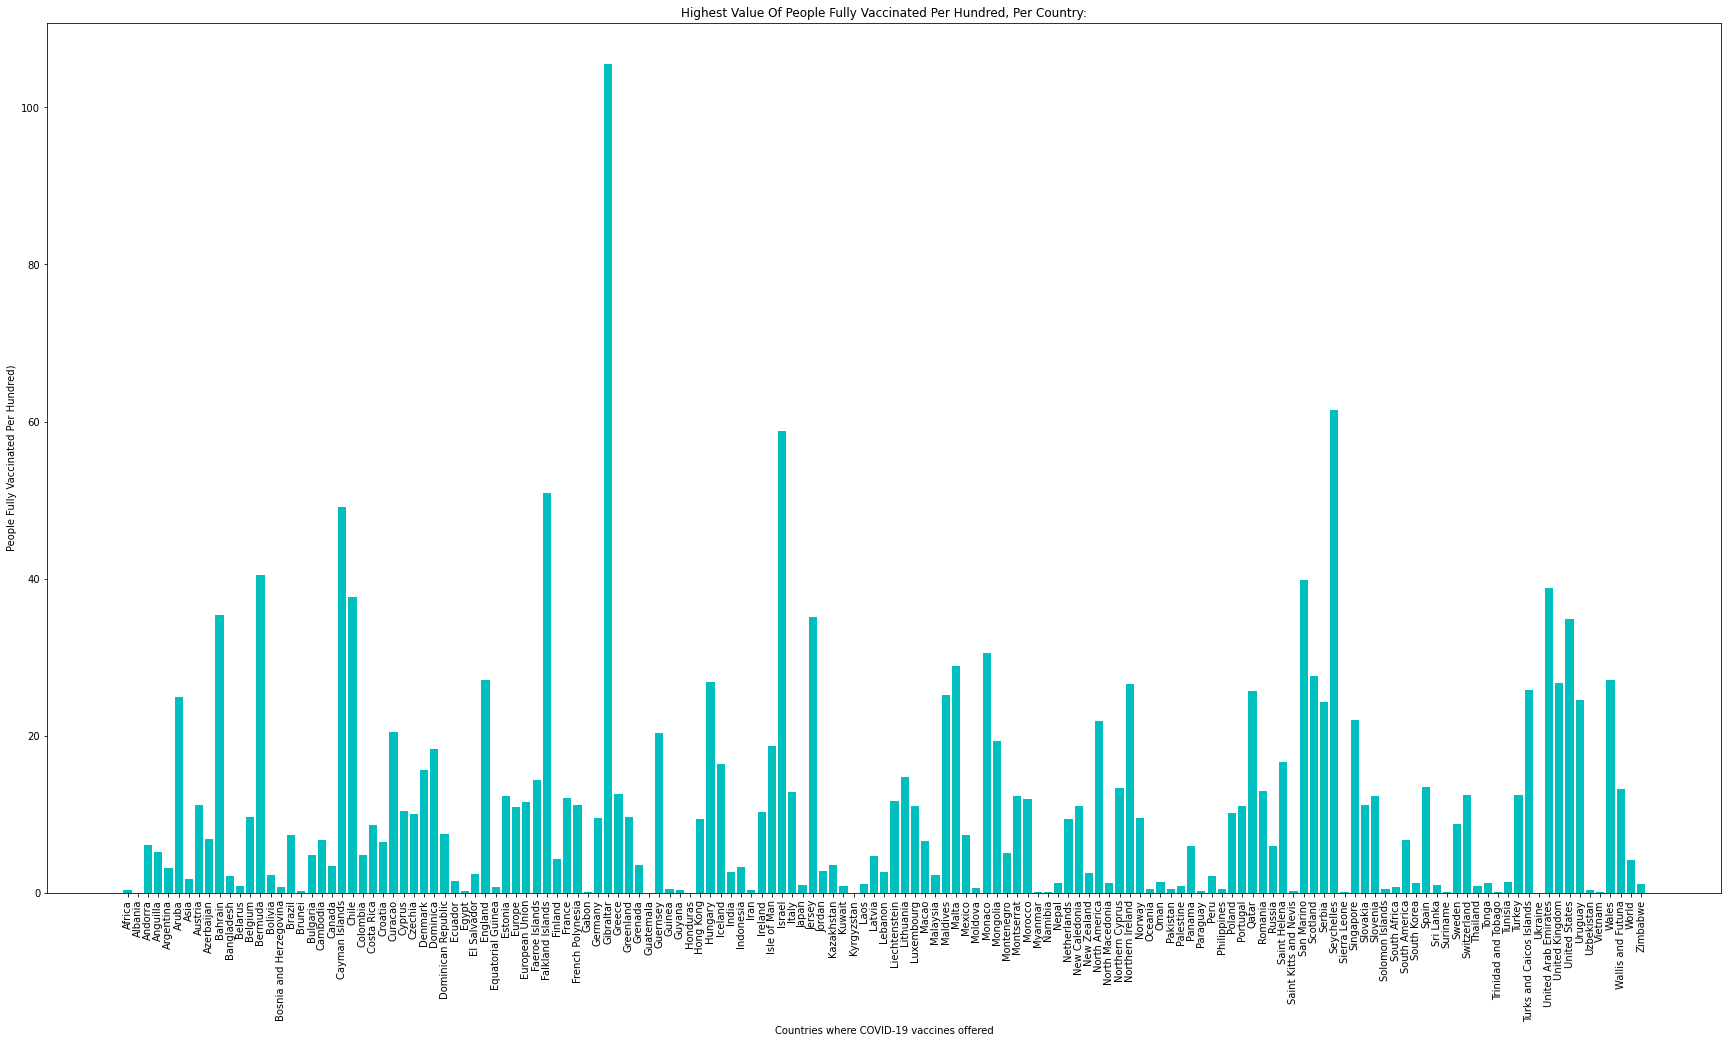

In [54]:
#line plot or try to make a graph 
plt.figure(figsize=(30, 16))

plt.bar(fully_vaccinated_df["Entity"], fully_vaccinated_df['people_fully_vaccinated_per_hundred'], color ='c')
plt.title('Highest Value Of People Fully Vaccinated Per Hundred, Per Country:')
plt.xticks(rotation = 90)
plt.ylabel('People Fully Vaccinated Per Hundred)')
plt.xlabel('Countries where COVID-19 vaccines offered')
plt.show()


In [49]:
total_vaccines_by_country_df

percents_df = total_vaccines_by_country_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df

Total no. of Vaccinations
location      vaccine                                      
Austria       Johnson&Johnson                      1.595786
              Moderna                              9.806054
              Oxford/AstraZeneca                  17.003175
              Pfizer/BioNTech                     71.594985
Belgium       Johnson&Johnson                      2.372735
...                                                     ...
United States Johnson&Johnson                      3.819521
              Moderna                             40.807412
              Pfizer/BioNTech                     55.373067
Uruguay       Oxford/AstraZeneca                   1.039034
              Pfizer/BioNTech                     24.962326

[125 rows x 1 columns]

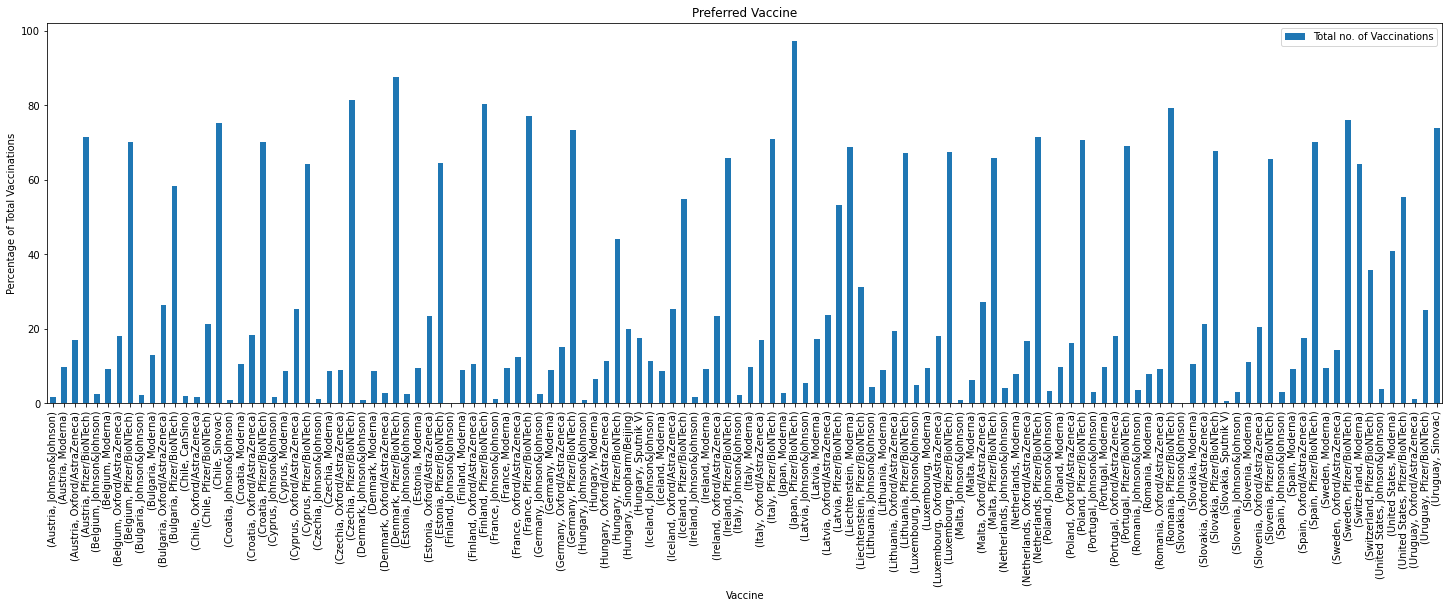

In [63]:
# area = widgets.Dropdown(
#     options=['All'] + list(data_country_df['location'].unique()),
#     value='All',
#     description='Country',
# )  
percents_df.plot.bar(figsize=(25,7))#, subplots=True)
plt.title('Preferred Vaccine')
plt.ylabel('Percentage of Total Vaccinations')
plt.xlabel('Vaccine')
plt.show();
# dfg.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
#          xlabel='Home Team', figsize=(6, 5))
# area = widgets.Dropdown(
#     options=['All'] + list(df['Area'].unique()),
#     value='All',
#     description='Area:'

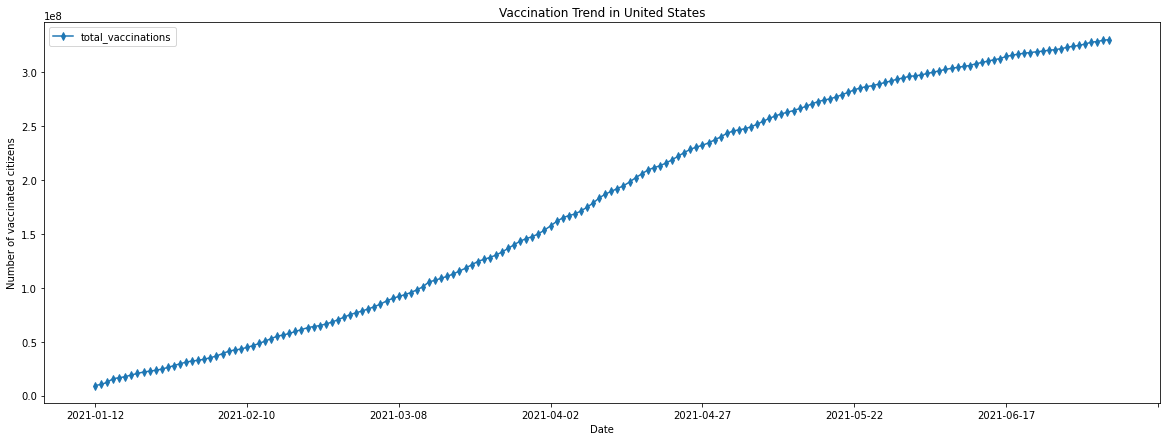

In [24]:
#Highest vaccinated country's trend(USA)
usa_data_df = data_country_df[data_country_df["location"] == "United States"]
usa_data_df
usa_date_vacc = usa_data_df.groupby("date")["total_vaccinations"].sum()
usa_date_vacc_df = pd.DataFrame(usa_date_vacc)
usa_date_vacc_df.plot.line(figsize=(20,7),marker = 'd',markersize =5)
plt.title('Vaccination Trend in United States')
plt.ylabel('Number of vaccinated citizens')
plt.xlabel('Date')
plt.show();